<a href="https://colab.research.google.com/github/Mankayarkarasi/MachineLearning/blob/master/TitanicKaggle/TitanicSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss
from sklearn.metrics.classification import accuracy_score
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.utils.fixes import signature
import matplotlib.colors
import random

import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense 

Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()



Saving train.csv to train (3).csv


In [0]:
import io
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [4]:
from google.colab import files
uploadedt = files.upload()


Saving test.csv to test (3).csv


In [0]:
df_test = pd.read_csv(io.BytesIO(uploadedt['test.csv']))

In [6]:
orig_train = df_train
orig_test = df_train


'''
df_train = orig_train
df_train = orig_test
'''

'\ndf_train = orig_train\ndf_train = orig_test\n'

In [0]:
def MissigdataPercent(train_Data):
	total = train_Data.isnull().sum().sort_values(ascending=False)
	percent = (train_Data.isnull().sum()/train_Data.isnull().count()).sort_values(ascending=False)
	missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
	return missing_data.head(10)

In [8]:
###############################################
###### Exploratory  Data  Analaysis   #########
######     Feature Engineering       ##########
###############################################
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [9]:
print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [10]:
print(df_train.shape)

(891, 12)


In [11]:
print(np.transpose(df_train.describe(include=['O']))) 

         count unique                                 top freq
Name       891    891  Vander Planke, Miss. Augusta Maria    1
Sex        891      2                                male  577
Ticket     891    681                            CA. 2343    7
Cabin      204    147                         C23 C25 C27    4
Embarked   889      3                                   S  644


In [12]:
#Get Top missing values
MissigdataPercent(df_train)


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [13]:
df_train.groupby('Pclass')['Age'].agg('mean')

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [0]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Pclass'] == 1), ['Age']] = round(df_train.groupby('Pclass')['Age'].agg('mean')[1],0)
df_train.loc[(df_train['Age'].isnull()) & (df_train['Pclass'] == 2), ['Age']] = round(df_train.groupby('Pclass')['Age'].agg('mean')[2],0)
df_train.loc[(df_train['Age'].isnull()) & (df_train['Pclass'] == 3), ['Age']] = round(df_train.groupby('Pclass')['Age'].agg('mean')[3],0)

In [15]:
# Group by Pclasses
df_train.groupby('Pclass').agg('count')[['Name','Cabin']]
#drop Cabin column from the table as it is around 80%

,Name,Cabin
Pclass,,
1,216,176
2,184,16
3,491,12


In [0]:
df_train = df_train.drop(['Cabin'], axis=1)

In [0]:
df_train['Embarked'] = df_train['Embarked'].fillna(method='bfill')

In [18]:
#Get Top missing values
MissigdataPercent(df_train)

,Total,Percent
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0
Survived,0,0.0


In [19]:
df_train['Title'] = df_train.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())
df_train['Title'].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
the Countess      1
Don               1
Capt              1
Jonkheer          1
Sir               1
Lady              1
Mme               1
Name: Title, dtype: int64

In [20]:
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
df_train.Title.loc[(df_train.Title !=  'Master') & (df_train.Title !=  'Mr') & (df_train.Title !=  'Miss') & (df_train.Title !=  'Mrs')] = 'Others'
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.796875
4,Others,0.318182


In [21]:
df_train['Title'].value_counts()

Mr        517
Miss      184
Mrs       128
Master     40
Others     22
Name: Title, dtype: int64

In [0]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Title'])], axis=1).drop(labels=['Name'], axis=1)

In [36]:
binar = LabelBinarizer().fit(df_train.loc[:, "Sex"])
df_train["Sex"] = binar.transform(df_train["Sex"])
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,A_Class,B_Class,C_Class,TravelAccompany,Master,Miss,Mr,Mrs,Others
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S,Mr,0,0,1,1,0,0,1,0,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C,Mrs,1,0,0,1,0,0,0,1,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,0,1,0,0,1,0,0,0
3,4,1,1,0,35.0,1,0,113803,53.1000,S,Mrs,1,0,0,1,0,0,0,1,0
4,5,0,3,1,35.0,0,0,373450,8.0500,S,Mr,0,0,1,0,0,0,1,0,0
5,6,0,3,1,25.0,0,0,330877,8.4583,Q,Mr,0,0,1,0,0,0,1,0,0
6,7,0,1,1,54.0,0,0,17463,51.8625,S,Mr,1,0,0,0,0,0,1,0,0
7,8,0,3,1,2.0,3,1,349909,21.0750,S,Master,0,0,1,1,1,0,0,0,0
8,9,1,3,0,27.0,0,2,347742,11.1333,S,Mrs,0,0,1,1,0,0,0,1,0
9,10,1,2,0,14.0,1,0,237736,30.0708,C,Mrs,0,1,0,1,0,0,0,1,0


In [37]:
df_Embarked = pd.get_dummies(df_train.Embarked)
df_Embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [0]:
# Pclass Encoding

df_train["A_Class"] = 0
df_train["B_Class"] = 0
df_train["C_Class"] = 0

df_train.loc[df_train.Pclass == 1, "A_Class"] = 1
df_train.loc[df_train.Pclass == 2, "B_Class"] = 1
df_train.loc[df_train.Pclass == 3, "C_Class"] = 1

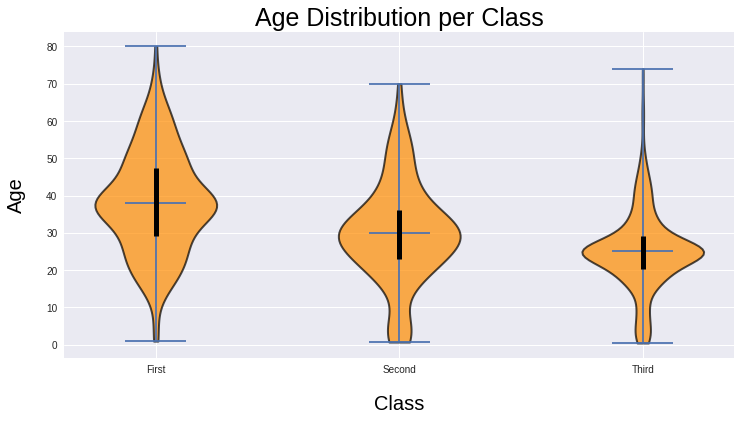

In [29]:
#Slicing the three classes
df_firstclass_ages = df_train[df_train.loc[:,'Pclass'] == 1]['Age'].copy()
df_secondclass_ages = df_train[df_train.loc[:,'Pclass'] == 2]['Age'].copy()
df_thirdclass_ages = df_train[df_train.loc[:,'Pclass'] == 3]['Age'].copy()

# Combining all classes in an array
df_train_class_ages =[df_firstclass_ages.values,
                    df_secondclass_ages.values,
                    df_thirdclass_ages.values]

# Font dictionary
font = {'color':  'black',
        'weight': 'normal',
        'size': 18,
}

# Building the figure and the axes for the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6) )

# plot violin plot
parts = axes.violinplot(df_train_class_ages
                   ,showmeans=False,
                    showmedians=True)
axes.set_title('Age Distribution per Class', fontdict=font, fontsize=25)

# Styling every violin in the graph
for pc in parts['bodies']:
    pc.set_facecolor('#FF8C00')
    pc.set_edgecolor('#000000')
    pc.set_linewidth(2)
    pc.set_alpha(0.7)


# adding horizontal grid lines
axes.yaxis.grid(True)
axes.set_xticks([y + 1 for y in range(len(df_train_class_ages))])
axes.set_xlabel('Class',fontdict=font, labelpad=20, size=20)
axes.set_ylabel('Age', fontdict=font,labelpad=20, size=20)


axes.vlines(1, df_firstclass_ages.describe()['25%'], df_firstclass_ages.describe()['75%'], color=['#000000'], linestyle='-', lw=5)
axes.vlines(2, df_secondclass_ages.describe()['25%'], df_secondclass_ages.describe()['75%'], color=['#000000'], linestyle='-', lw=5)
axes.vlines(3, df_thirdclass_ages.describe()['25%'], df_thirdclass_ages.describe()['75%'], color=['#000000'], linestyle='-', lw=5)
#axes.vlines(2, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# add x-tick labels
plt.setp(axes, xticks=[y + 1 for y in range(len(df_train_class_ages))],
         xticklabels=['First', 'Second','Third'])


plt.show()

In [0]:
##The first class has a wide range of passengers with a mean age of nearly 40. This looks different in the second class. 
##The passengers have at least the same range of ages but the mean age here is more in the area of 30 years. 
## The same is with third class but here is the age range not so high as with the other classes. 
##It's even much smaller outside the mean age of 25. The most passengers in the third class are around 25 years old.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


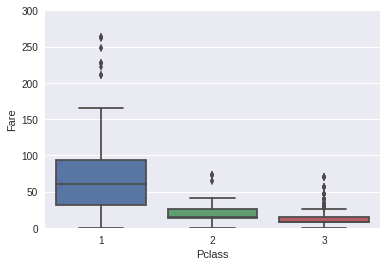

In [39]:
sns.boxplot('Pclass','Fare',data=df_train)
plt.ylim(0, 300) # ignore one data point with Fare > 500
plt.show()

In [0]:
#df_train.Ticket = df_train.Ticket.map(lambda x: x[0])

# inspect the correlation between Ticket and Survived
#df_train[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

In [32]:
#df_train['Ticket'] = df_train['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')
#df_train[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.166667
4,C,0.340426
5,P,0.646154
6,S,0.323077


In [0]:
#df_train = pd.get_dummies(df_train,columns=['Ticket'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


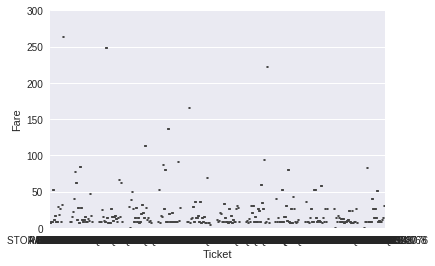

In [64]:
sns.boxplot('Ticket','Fare',data=df_train)
plt.ylim(0, 300) # ignore one data point with Fare > 500
plt.show()

In [41]:
# Boarding Together or Alone
for i in range(len(df_train)):
    if df_train.loc[i, "SibSp"] + df_train.loc[i, "Parch"] == 0:
        df_train.loc[i, "TravelAccompany"] = 0
    else:
        df_train.loc[i, "TravelAccompany"] = 1

df_train.TravelAccompany = df_train.TravelAccompany.astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,A_Class,B_Class,C_Class,TravelAccompany,Master,Miss,Mr,Mrs,Others
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S,Mr,0,0,1,1,0,0,1,0,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C,Mrs,1,0,0,1,0,0,0,1,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,0,1,0,0,1,0,0,0
3,4,1,1,0,35.0,1,0,113803,53.1000,S,Mrs,1,0,0,1,0,0,0,1,0
4,5,0,3,1,35.0,0,0,373450,8.0500,S,Mr,0,0,1,0,0,0,1,0,0


In [42]:
df = pd.concat([df_train, df_Embarked], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,C_Class,TravelAccompany,Master,Miss,Mr,Mrs,Others,C,Q,S
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S,...,1,1,0,0,1,0,0,0,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C,...,0,1,0,0,0,1,0,1,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,...,1,0,0,1,0,0,0,0,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,S,...,0,1,0,0,0,1,0,0,0,1
4,5,0,3,1,35.0,0,0,373450,8.0500,S,...,1,0,0,0,1,0,0,0,0,1


In [0]:
feature_name = ["Sex", "Age", "Fare", "TravelAccompany","A_Class", "B_Class", "C_Class", "C", "Q", "S", "SibSp", "Parch","Master","Miss","Mr","Mrs","Others"]

X_train = df[feature_name]
y_train = df['Survived']

In [44]:
MissigdataPercent(df_test)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [0]:
df_test.loc[(df_test['Age'].isnull()) & (df_test['Pclass'] == 1), ['Age']] = round(df_test.groupby('Pclass')['Age'].agg('mean')[1],0)
df_test.loc[(df_test['Age'].isnull()) & (df_test['Pclass'] == 2), ['Age']] = round(df_test.groupby('Pclass')['Age'].agg('mean')[2],0)
df_test.loc[(df_test['Age'].isnull()) & (df_test['Pclass'] == 3), ['Age']] = round(df_test.groupby('Pclass')['Age'].agg('mean')[3],0)

In [0]:
df_test = df_test.drop(['Cabin'], axis=1)

In [0]:
df_test['Fare'].fillna(0, inplace=True)
fareval =  np.mean(df_test.Fare)
df_test.loc[df_test.Fare == 0, 'Fare'] = fareval

In [48]:
#Get Top missing values
MissigdataPercent(df_test)

,Total,Percent
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0
PassengerId,0,0.0


In [49]:
df_test['Title'] = df_test.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [50]:
df_test['Title'] = df_test['Title'].replace(['Ms'], 'Mrs')
df_test.Title.loc[(df_test.Title !=  'Master') & (df_test.Title !=  'Mr') & (df_test.Title !=  'Miss') & (df_test.Title !=  'Mrs')] = 'Others'


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        73
Master     21
Others      6
Name: Title, dtype: int64

In [0]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['Title'])], axis=1).drop(labels=['Name'], axis=1)

In [53]:
df_TEmbarked = pd.get_dummies(df_test.Embarked)
df_TEmbarked.head()



,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [0]:
# Pclass Encoding

df_test["A_Class"] = 0
df_test["B_Class"] = 0
df_test["C_Class"] = 0

df_test.loc[df_test.Pclass == 1, "A_Class"] = 1
df_test.loc[df_test.Pclass == 2, "B_Class"] = 1
df_test.loc[df_test.Pclass == 3, "C_Class"] = 1

In [55]:
binartest = LabelBinarizer().fit(df_test.loc[:, "Sex"])
df_test["Sex"] = binartest.transform(df_test["Sex"])
df_test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Master,Miss,Mr,Mrs,Others,A_Class,B_Class,C_Class
0,892,3,1,34.5,0,0,330911,7.8292,Q,Mr,0,0,1,0,0,0,0,1
1,893,3,0,47.0,1,0,363272,7.0000,S,Mrs,0,0,0,1,0,0,0,1
2,894,2,1,62.0,0,0,240276,9.6875,Q,Mr,0,0,1,0,0,0,1,0
3,895,3,1,27.0,0,0,315154,8.6625,S,Mr,0,0,1,0,0,0,0,1
4,896,3,0,22.0,1,1,3101298,12.2875,S,Mrs,0,0,0,1,0,0,0,1
5,897,3,1,14.0,0,0,7538,9.2250,S,Mr,0,0,1,0,0,0,0,1
6,898,3,0,30.0,0,0,330972,7.6292,Q,Miss,0,1,0,0,0,0,0,1
7,899,2,1,26.0,1,1,248738,29.0000,S,Mr,0,0,1,0,0,0,1,0
8,900,3,0,18.0,0,0,2657,7.2292,C,Mrs,0,0,0,1,0,0,0,1
9,901,3,1,21.0,2,0,A/4 48871,24.1500,S,Mr,0,0,1,0,0,0,0,1


In [0]:
#df_test.Ticket = df_test.Ticket.map(lambda x: x[0])


#df_test['Ticket'] = df_test['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

#df_test = pd.get_dummies(df_test,columns=['Ticket'])


In [56]:
# Boarding Together or Alone
for i in range(len(df_test)):
    if df_test.loc[i, "SibSp"] + df_test.loc[i, "Parch"] == 0:
        df_test.loc[i, "TravelAccompany"] = 0
    else:
        df_test.loc[i, "TravelAccompany"] = 1

df_test.TravelAccompany = df_test.TravelAccompany.astype(int)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Master,Miss,Mr,Mrs,Others,A_Class,B_Class,C_Class,TravelAccompany
0,892,3,1,34.5,0,0,330911,7.8292,Q,Mr,0,0,1,0,0,0,0,1,0
1,893,3,0,47.0,1,0,363272,7.0000,S,Mrs,0,0,0,1,0,0,0,1,1
2,894,2,1,62.0,0,0,240276,9.6875,Q,Mr,0,0,1,0,0,0,1,0,0
3,895,3,1,27.0,0,0,315154,8.6625,S,Mr,0,0,1,0,0,0,0,1,0
4,896,3,0,22.0,1,1,3101298,12.2875,S,Mrs,0,0,0,1,0,0,0,1,1


In [57]:
dftest = pd.concat([df_test, df_TEmbarked], axis=1)
dftest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,...,Mr,Mrs,Others,A_Class,B_Class,C_Class,TravelAccompany,C,Q,S
0,892,3,1,34.5,0,0,330911,7.8292,Q,Mr,...,1,0,0,0,0,1,0,0,1,0
1,893,3,0,47.0,1,0,363272,7.0000,S,Mrs,...,0,1,0,0,0,1,1,0,0,1
2,894,2,1,62.0,0,0,240276,9.6875,Q,Mr,...,1,0,0,0,1,0,0,0,1,0
3,895,3,1,27.0,0,0,315154,8.6625,S,Mr,...,1,0,0,0,0,1,0,0,0,1
4,896,3,0,22.0,1,1,3101298,12.2875,S,Mrs,...,0,1,0,0,0,1,1,0,0,1


In [0]:
feature_name = ["Sex", "Age", "Fare", "TravelAccompany","A_Class", "B_Class", "C_Class", "C", "Q", "S", "SibSp", "Parch","Master","Miss","Mr","Mrs","Others"]


X_test = dftest[feature_name]


In [62]:
model = Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(X_train, y_train, batch_size = 64, epochs = 500)

Epoch 1/500
891/891 [==============================] - 0s 415us/step - loss: 0.6924 - acc: 0.6083
Epoch 2/500
891/891 [==============================] - 0s 25us/step - loss: 0.6910 - acc: 0.6162
Epoch 3/500
891/891 [==============================] - 0s 25us/step - loss: 0.6893 - acc: 0.6184
Epoch 4/500
891/891 [==============================] - 0s 24us/step - loss: 0.6875 - acc: 0.6263
Epoch 5/500
891/891 [==============================] - 0s 23us/step - loss: 0.6850 - acc: 0.6420
Epoch 6/500
891/891 [==============================] - 0s 21us/step - loss: 0.6815 - acc: 0.6723
Epoch 7/500
891/891 [==============================] - 0s 23us/step - loss: 0.6769 - acc: 0.6824
Epoch 8/500
891/891 [==============================] - 0s 23us/step - loss: 0.6718 - acc: 0.6745
Epoch 9/500
891/891 [==============================] - 0s 27us/step - loss: 0.6674 - acc: 0.6790
Epoch 10/500
891/891 [==============================] - 0s 24us/step - loss: 0.6643 - acc: 0.6880
Epoch 11/500
891/891 [======

In [0]:
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_final})
output.to_csv('titanicprediction.csv', index=False)

from google.colab import files
files.download('titanicprediction.csv') 